# Cancer Detection
___

- Class

    **2** : `Benign Cancer`
    
    **4** : `Malignant Cancer`
    


### Importing Libraries

In [59]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

### Loading Data

In [60]:
data = pd.read_excel(r"C:\Users\arpit\Desktop\Inter\data_second.xlsx")
data.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare_Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,"Class: (2 for benign, 4 for malignant)",4 for malignant)
0,1000025,5,1,1,1,2,1,3,1,1,2,NaN
1,1002945,5,4,4,5,7,10,3,2,1,2,NaN
2,1015425,3,1,1,1,2,2,3,1,1,2,NaN
3,1016277,6,8,8,1,3,4,3,7,1,2,NaN
4,1017023,4,1,1,3,2,1,3,1,1,2,NaN


In [61]:
del(data[' 4 for malignant)'])

In [62]:
data.dtypes

Sample code number                          int64
Clump Thickness                             int64
Uniformity of Cell Size                     int64
Uniformity of Cell Shape                    int64
Marginal Adhesion                           int64
Single Epithelial Cell Size                 int64
Bare_Nuclei                                object
Bland Chromatin                             int64
Normal Nucleoli                             int64
Mitoses                                     int64
Class: (2 for benign,  4 for malignant)     int64
dtype: object

In [63]:
data.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,"Class: (2 for benign, 4 for malignant)"
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


### Data Preprocessing

In [64]:
## Labelling Malignant Cancer as 1 (False cases benign cancer as 0)

data['Class: (2 for benign,  4 for malignant)'].loc[data['Class: (2 for benign,  4 for malignant)'] == 2,] = 0
data['Class: (2 for benign,  4 for malignant)'].loc[data['Class: (2 for benign,  4 for malignant)'] == 4,]= 1

C:\Users\arpit\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [65]:
data.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare_Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,"Class: (2 for benign, 4 for malignant)"
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


In [66]:
# Distribution of class labels
print (data['Class: (2 for benign,  4 for malignant)'].value_counts())

0    458
1    241
Name: Class: (2 for benign,  4 for malignant), dtype: int64


In [67]:
## null cases
pd.isnull(data).sum()

Sample code number                         0
Clump Thickness                            0
Uniformity of Cell Size                    0
Uniformity of Cell Shape                   0
Marginal Adhesion                          0
Single Epithelial Cell Size                0
Bare_Nuclei                                0
Bland Chromatin                            0
Normal Nucleoli                            0
Mitoses                                    0
Class: (2 for benign,  4 for malignant)    0
dtype: int64

In [68]:
data.columns

Index(['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare_Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses',
       'Class: (2 for benign,  4 for malignant)'],
      dtype='object')

In [69]:
# df = data[['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',
#        'Uniformity of Cell Shape', 'Marginal Adhesion',
#        'Single Epithelial Cell Size', 'Bare_Nuclei', 'Bland Chromatin',
#        'Normal Nucleoli', 'Mitoses', 'Class: (2 for benign,  4 for malignant)']]

df = data

In [70]:
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare_Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,"Class: (2 for benign, 4 for malignant)"
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


In [71]:
df['Bare_Nuclei'].unique()

array([1, 10, 2, 4, 3, 9, 7, '?', 5, 8, 6], dtype=object)

In [72]:
a = df['Bare_Nuclei'][df['Bare_Nuclei'] != '?']

print (a.value_counts())
print (a.mean())
print (a.median())

1     402
10    132
5      30
2      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare_Nuclei, dtype: int64
3.5446559297218156
1.0


In [73]:
## Treating Missing values
## As frequency of 1 is much higher than others we prefer to go with mode = 1 to fill missing values

df['Bare_Nuclei'].loc[df['Bare_Nuclei']=='?',] = 1

C:\Users\arpit\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [74]:
df.dtypes

Sample code number                         int64
Clump Thickness                            int64
Uniformity of Cell Size                    int64
Uniformity of Cell Shape                   int64
Marginal Adhesion                          int64
Single Epithelial Cell Size                int64
Bare_Nuclei                                int64
Bland Chromatin                            int64
Normal Nucleoli                            int64
Mitoses                                    int64
Class: (2 for benign,  4 for malignant)    int64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028F372FCAC8>]],
      dtype=object)

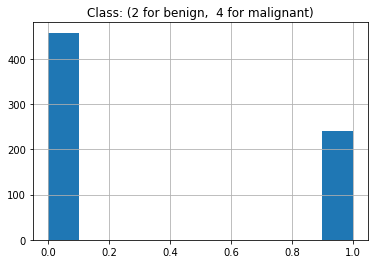

In [75]:
## distribution of class label
df.hist(column = 'Class: (2 for benign,  4 for malignant)')

In [76]:
list(df.columns)[1:10]

['Clump Thickness',
 'Uniformity of Cell Size',
 'Uniformity of Cell Shape',
 'Marginal Adhesion',
 'Single Epithelial Cell Size',
 'Bare_Nuclei',
 'Bland Chromatin',
 'Normal Nucleoli',
 'Mitoses']

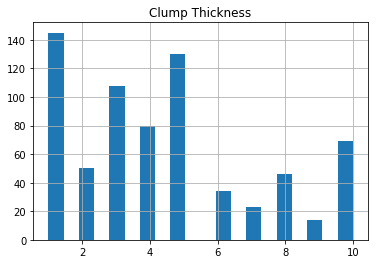

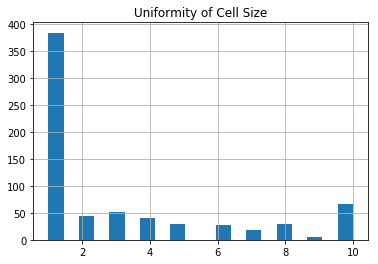

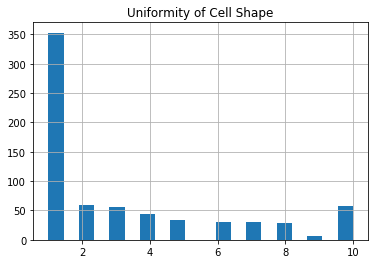

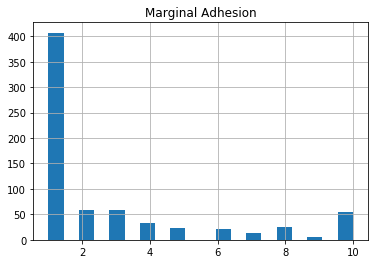

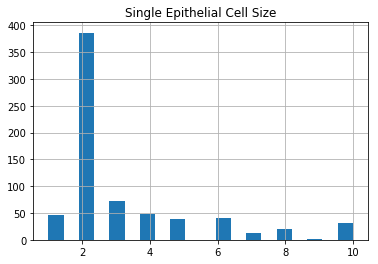

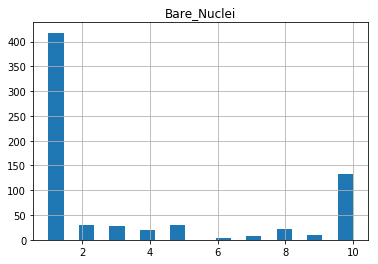

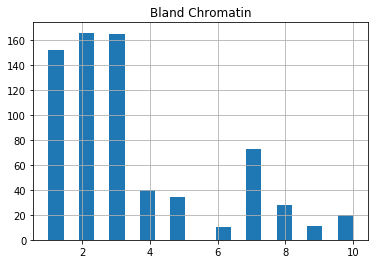

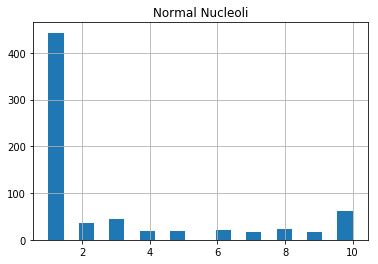

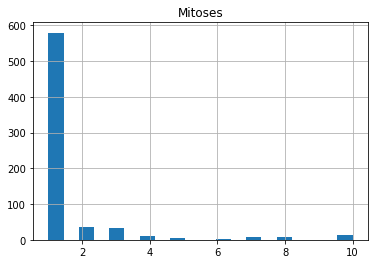

In [77]:
## distribution of features..
col_list = list(df.columns)[1:10]
for col in col_list:
    df.hist(column = col, bins=20)

In [78]:
df.columns

Index(['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare_Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses',
       'Class: (2 for benign,  4 for malignant)'],
      dtype='object')

In [79]:
feature_list = ['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare_Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses']

## Data Modelling
___

### K-Fold Logistic regression

In [99]:
from sklearn.model_selection import KFold
X = df[feature_list].values
Y = df['Class: (2 for benign,  4 for malignant)'].values
kf = KFold(n_splits=5)

In [81]:
from sklearn.model_selection import cross_val_score,train_test_split
logreg = LogisticRegression()
lr_cv_score = cross_val_score(logreg, X, Y, cv=5, scoring='roc_auc')
print("=== All AUC Scores ===")
print(lr_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Logistic Regression: ", lr_cv_score.mean())

=== All AUC Scores ===
[0.97914818 0.99116848 0.99524457 0.99931319 0.99977106]


=== Mean AUC Score ===
Mean AUC Score - Logistic Regression:  0.992929094714809


In [82]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    from sklearn.linear_model import LogisticRegression
    from sklearn import metrics
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
    from sklearn.metrics import confusion_matrix
    confusion_matrix = confusion_matrix(y_test, y_pred)
    print(confusion_matrix)

Accuracy of logistic regression classifier on test set: 0.90
[[75  3]
 [11 51]]
Accuracy of logistic regression classifier on test set: 0.96
[[72  4]
 [ 2 62]]
Accuracy of logistic regression classifier on test set: 0.96
[[88  3]
 [ 2 47]]
Accuracy of logistic regression classifier on test set: 0.99
[[108   1]
 [  1  30]]
Accuracy of logistic regression classifier on test set: 1.00
[[104   0]
 [  0  35]]


In [83]:
from sklearn.model_selection import KFold
X = df[feature_list].values
Y = df['Class: (2 for benign,  4 for malignant)'].values
kf = KFold(n_splits=5)
kf.get_n_splits(X)

5

In [84]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    from sklearn.linear_model import LogisticRegression
    from sklearn import metrics
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
    from sklearn.metrics import confusion_matrix
    confusion_matrix = confusion_matrix(y_test, y_pred)
    print(confusion_matrix)

Accuracy of logistic regression classifier on test set: 0.90
[[75  3]
 [11 51]]
Accuracy of logistic regression classifier on test set: 0.96
[[72  4]
 [ 2 62]]
Accuracy of logistic regression classifier on test set: 0.96
[[88  3]
 [ 2 47]]
Accuracy of logistic regression classifier on test set: 0.99
[[108   1]
 [  1  30]]
Accuracy of logistic regression classifier on test set: 1.00
[[104   0]
 [  0  35]]


### CV RandomForest

In [85]:
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import classification_report, confusion_matrix, recall_score
from sklearn.ensemble import RandomForestClassifier


X = df[feature_list]
y = df['Class: (2 for benign,  4 for malignant)'].values

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify = y)

In [87]:
##  giving best results

# Max depth = 4
# n_estimators = 10
# Calss_weight = 'balanced'

In [88]:
rfc = RandomForestClassifier(n_estimators=10, max_depth=4, random_state=100, verbose=1, class_weight='balanced')
rfc_cv_score = cross_val_score(rfc, X, y, cv=5, scoring='roc_auc')

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [89]:
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== All AUC Scores ===
[0.97970275 0.98369565 0.99014946 0.99954212 0.99771062]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.9901601213227765


In [90]:
print (rfc)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=4, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=100,
            verbose=1, warm_start=False)


In [91]:
rf = rfc.fit(X_train,y_train)
rf_predict = rf.predict(X_test)
rf_predict_proba = rf.predict_proba(X_test)

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [92]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rf_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rf_predict))
print('\n')

tn, fp, fn, tp = confusion_matrix(y_test, rf_predict).ravel()
print("=== False Negatives {Actual : 1 (Malignant Cancer) Prediction : 0 (Benign Cancer)}  : ", fn)

=== Confusion Matrix ===
[[132   6]
 [  3  69]]


=== Classification Report ===
             precision    recall  f1-score   support

          0       0.98      0.96      0.97       138
          1       0.92      0.96      0.94        72

avg / total       0.96      0.96      0.96       210



=== False Negatives {Actual : 1 (Malignant Cancer) Prediction : 0 (Benign Cancer)}  :  3


                             importance
feature                                
Single Epithelial Cell Size       0.315
Uniformity of Cell Shape          0.280
Bare_Nuclei                       0.156
Uniformity of Cell Size           0.125
Bland Chromatin                   0.083
Normal Nucleoli                   0.021
Clump Thickness                   0.015
Marginal Adhesion                 0.003
Mitoses                           0.001


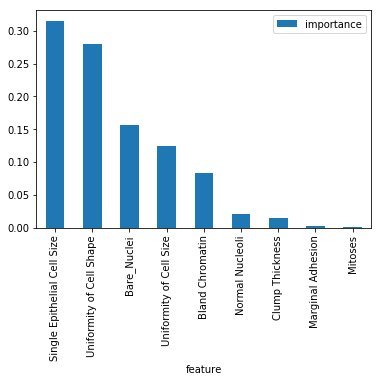

In [93]:
## Variable Importance

importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
print (importances)
importances.plot.bar()

> Reducing False Negatives as we have to reduce cases where we predict benign cancer but actual is malignant cancer which represents False Negative here

In [94]:
threshold = 0.25

In [95]:
rf_predict_proba = rf.predict_proba(X_test)
rf_predict_t = rf_predict_proba[:,1]

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [96]:
rf_predict_t[rf_predict_t < threshold] = 0
rf_predict_t[rf_predict_t >= threshold] = 1

In [97]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rf_predict_t))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rf_predict_t))
print('\n')

tn, fp, fn, tp = confusion_matrix(y_test, rf_predict_t).ravel()
print("=== False Negatives {Actual : 1 (Malignant Cancer) Prediction : 0 (Benign Cancer)}  : ", fn)

=== Confusion Matrix ===
[[129   9]
 [  0  72]]


=== Classification Report ===
             precision    recall  f1-score   support

          0       1.00      0.93      0.97       138
          1       0.89      1.00      0.94        72

avg / total       0.96      0.96      0.96       210



=== False Negatives {Actual : 1 (Malignant Cancer) Prediction : 0 (Benign Cancer)}  :  0


In [98]:
# As we decrease threshold from 0.5 to 0.2 False negatives goes from 3 to 0 and hence all malignant cases are predicted correctly 
# but we increase error in predicting benign cancer which tells us the tradeoff in selecting threshold. So, in order to reduce
# error in predicting malignant cancer we need to decrease threshold so that our model predicts class 1 with highest recall.  